<h1 style="color: black; padding: 15px; display: table; text-align: center; 
           box-shadow: 5px 5px 10px rgba(0,0,0,0.3); width: fit-content; margin: auto;">
  <span style="background-color: #f5f5f5; padding: 5px; border: 3px solid black; display: inline-block;">
    Multiple Linear Regression
  </span>
</h1>


<!-- Add this in an HTML cell -->

<h2><b>Multiple Linear Regression</b></h2>
<p>Multiple Linear Regression (MLR) is an extension of simple linear regression, where the model predicts a dependent variable <b>Y</b> using multiple independent variables <b>X<sub>1</sub>, X<sub>2</sub>, …, X<sub>n</sub></b>. The equation for MLR is:</p>

<p><b>Y = β<sub>0</sub> + β<sub>1</sub>X<sub>1</sub> + β<sub>2</sub>X<sub>2</sub> + … + β<sub>n</sub>X<sub>n</sub> + ϵ</b></p>

<p>where:</p>
<ul>
  <li><b>Y</b> is the dependent variable (target).</li>
  <li><b>X<sub>1</sub>, X<sub>2</sub>, ..., X<sub>n</sub></b> are independent variables (features).</li>
  <li><b>β<sub>0</sub></b> is the intercept.</li>
  <li><b>β<sub>1</sub>, β<sub>2</sub>, ..., β<sub>n</sub></b> are the coefficients (weights).</li>
  <li><b>ϵ</b> is the error term.</li>
</ul>
<p>The goal of MLR is to find the best-fitting line (hyperplane) that minimizes the error between predicted and actual values.</p>

<hr>

<h2><b>Why Use Gradient Descent in MLR?</b></h2>
<p>To find the optimal values of the coefficients <b>β</b>, we minimize the cost function, typically the <b>Mean Squared Error (MSE)</b>:</p>

<p><b>J(β) = (1 / 2m) Σ (Y<sub>i</sub> − Ŷ<sub>i</sub>)²</b></p>

<p>where <b>m</b> is the number of data points, and <b>Ŷ<sub>i</sub></b> is the predicted value.</p>

<p>There are two main ways to find the coefficients:</p>
<ol>
  <li><b>Normal Equation:</b> A closed-form solution using matrix operations. However, it becomes computationally expensive for large datasets.</li>
  <li><b>Gradient Descent:</b> An iterative optimization algorithm that efficiently finds the best coefficients.</li>
</ol>

<p><b>Gradient Descent is used because:</b></p>
<ul>
  <li>It works well with large datasets.</li>
  <li>It avoids computing expensive matrix inversions.</li>
  <li>It is useful when the number of features is high.</li>
</ul>

<hr>

<h2><b>Types of Gradient Descent</b></h2>

<h3><b>1. Batch Gradient Descent (BGD)</b></h3>
<ul>
  <li>Uses the entire dataset to compute gradients.</li>
  <li>Slow for large datasets.</li>
  <li>Converges steadily but can get stuck in local minima.</li>
</ul>

<h3><b>2. Stochastic Gradient Descent (SGD)</b></h3>
<ul>
  <li>Updates weights using one data point at a time.</li>
  <li>Faster but has high variance (noisy updates).</li>
  <li>Can escape local minima, but may not converge smoothly.</li>
</ul>

<h3><b>3. Mini-Batch Gradient Descent (MBGD)</b></h3>
<ul>
  <li>Uses small batches of data to update weights.</li>
  <li>Balances efficiency and stability.</li>
  <li>Commonly used in machine learning.</li>
</ul>

<hr>




<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Load & Read Data 
</h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random

In [2]:
df=pd.read_csv("/kaggle/input/advertising-dataset/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
   Data Visualization  
</h3>  

<Axes: >

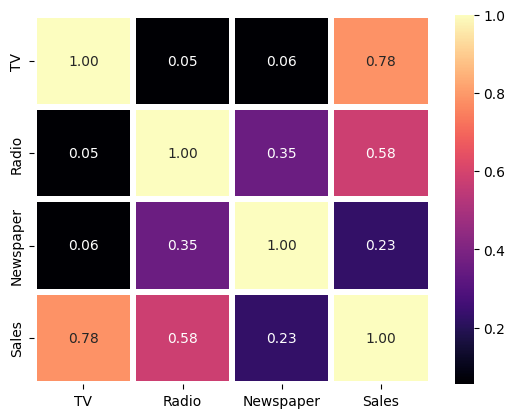

In [10]:
dt=df.select_dtypes(include='number')
sns.heatmap(dt.corr(),annot=True,cmap='magma',fmt='0.2f',linewidth=3)

In [11]:
fig=px.scatter(df,x='Newspaper',y='Radio',color='Sales',title='Scatter For Radio vs Newspaper')
fig

In [12]:
fig=px.scatter(df,x='Radio',y='Sales',color='Sales',title='Scatter For Radio vs Sales')
fig

In [13]:
fig=px.scatter(df,x='Sales',y='TV',color='Sales',title='Scatter For Sales VS TV')
fig

<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
   Data Scalling  
</h3>  

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Split Data  
</h3>  

In [15]:
x=df_scaled.drop(columns='Sales')
y=df_scaled['Sales']

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=11)

<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
MSE & R2_Score   
</h3>  

In [17]:
def MSE(x,y,w,b):
    x=np.array(x)
    y=np.array(y)
    n=len(y) 
    y_pre=np.dot(x,w)+b
    summation=0
    for i in range(n):
        summation+=((y[i]-y_pre[i])**2)   
    return summation/n 

In [18]:
def R2_score(x,y,w,b):
    g=MSE(x,y,w,b)/np.var(y)
    return (1-g)*100

<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Batch_Gradient_Descent
</h3>  

<h3 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Batch Gradient Descent (BGD) - Explained
</h3>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 What is Batch Gradient Descent?
</h4>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Batch Gradient Descent (BGD) is an optimization algorithm used in machine learning to minimize the cost function by adjusting the model parameters iteratively using the entire dataset.
</p>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  📍 Steps of Batch Gradient Descent
</h4>
<ol style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>1️⃣ <b>Initialize Parameters:</b> Start with random values for the model parameters (weights & biases).</li>
  <li>2️⃣ <b>Compute the Cost Function:</b> Use all training samples to calculate the cost function.</li>
  <li>3️⃣ <b>Compute the Gradient:</b> Compute the gradient (partial derivatives) using the entire dataset.</li>
  <li>4️⃣ <b>Update Parameters:</b> Adjust parameters using the learning rate (𝛼) and the computed gradients.</li>
  <li>5️⃣ <b>Repeat Until Convergence:</b> Continue updating parameters until the cost function stabilizes.</li>
</ol>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  📍 Mathematical Formula:
</h4>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
θ = θ - α ⋅ ∇J(θ)
</pre>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Where:
</p>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>θ represents the parameters (weights & biases).</li>
  <li>α is the learning rate.</li>
  <li>∇J(θ) is the gradient of the cost function.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Advantages of Batch Gradient Descent
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>✅ <b>Stable Convergence:</b> Uses the full dataset, leading to smooth updates.</li>
  <li>✅ <b>Fewer Updates per Epoch:</b> Parameters are updated once per iteration.</li>
  <li>✅ <b>Deterministic Behavior:</b> Always follows the same path toward convergence.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Disadvantages of Batch Gradient Descent
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>❌ <b>Slow for Large Datasets:</b> Computing gradients for the entire dataset can be computationally expensive.</li>
  <li>❌ <b>High Memory Usage:</b> Requires loading the entire dataset into memory.</li>
  <li>❌ <b>May Get Stuck in Local Minima:</b> Since it follows a fixed direction, it may struggle to escape poor local optima.</li>
</ul>


In [19]:
def Batch_Gradient_Descent(x_training,y_training,learning_rate,epoch,w,b):
    x_training=np.array(x_training)
    y_training=np.array(y_training)
    if y_training.ndim==1:
        y_training=y_training.reshape(-1,1)
    n=len(x_training)
    w=np.zeros((x_training.shape[1],1))
    loss=[]
    epoch_save=[]
    for i in range(epoch):
        ypred=np.dot(x_training,w)+b
        w_der=(-2/n)*((np.dot(x_training.T,(y_training-ypred))))
        b_der=(-2/n)*(np.sum(y_training-ypred))
        w-=learning_rate*w_der
        b-=learning_rate*b_der
        if i%2==0:
            epoch_save.append(i)
            loss.append(MSE(x_training,y_training,w,b))
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_save, loss, linestyle='-', color='blue', marker='o', markersize=5, markerfacecolor='red', label='MSE Loss')  
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Batch Gradient Descent - Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
    return w,b
            

<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Stochastic_Gradient_Descent
</h3>  

<h3 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Stochastic Gradient Descent (SGD) - Explained
</h3>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 What is Stochastic Gradient Descent?
</h4>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Stochastic Gradient Descent (SGD) is an optimization algorithm used to minimize a cost function by updating the model’s parameters after processing 
  one randomly selected training example at a time.
</p>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  📍 Mathematical Formula:
</h4>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
θ = θ - α ⋅ ∇J(θ, xᵢ, yᵢ)
</pre>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Where:
</p>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>θ represents the parameters (weights & biases).</li>
  <li>α is the learning rate.</li>
  <li>∇J(θ, xᵢ, yᵢ) is the gradient of the cost function for one example.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Steps to Implement Stochastic Gradient Descent
</h4>
<ol style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>1️⃣ Initialize parameters with random values.</li>
  <li>2️⃣ Shuffle the dataset to avoid biased updates.</li>
  <li>3️⃣ For each training example (xᵢ, yᵢ), compute the gradient and update parameters.</li>
  <li>4️⃣ Repeat the updates until convergence is achieved.</li>
</ol>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  ✅ Advantages of Stochastic Gradient Descent
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>✅ Faster computation as updates happen after each training example.</li>
  <li>✅ Low memory usage, making it ideal for large datasets.</li>
  <li>✅ Can escape local minima due to the randomness in updates.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  ❌ Disadvantages of Stochastic Gradient Descent
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>❌ High variability in updates can cause fluctuations in the cost function.</li>
  <li>❌ Might not converge exactly due to frequent updates.</li>
  <li>❌ Sensitive to learning rate selection.</li>
</ul>


In [20]:
def Stochastic_Gradient_Descent(x_training, y_training, learning_rate, epoch, w, b):
    x_training = np.array(x_training)
    y_training = np.array(y_training)
    if y_training.ndim == 1:
        y_training = y_training.reshape(-1, 1)
    n = len(x_training)
    loss = []
    epoch_save=[]
    for j in range(epoch):
        randomsample = np.random.permutation(n)
        epoch_loss = 0
        for i in randomsample:
            x_training_update = x_training[i].reshape(1, -1)
            y_pred = np.dot(x_training_update, w) + b 
            w_der = (-2) * np.dot(x_training_update.T, (y_training[i] - y_pred))
            b_der = (-2) * (y_training[i] - y_pred)
            w -= learning_rate * w_der
            b -= learning_rate * b_der
            epoch_loss += MSE(x_training_update,y_training[i],w,b)
        epoch_loss /= n 
        if j%5==0:
            epoch_save.append(j)
            loss.append(epoch_loss)
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_save, loss, linestyle='-', color='blue', marker='o', markersize=5, markerfacecolor='red', label='MSE Loss')  
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('stochastic Gradient Descent - Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    return w, b

<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
MiniBatch_Gradient_Descent
</h3>  

<h3 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Mini-Batch Gradient Descent (MBGD) - Explained
</h3>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 What is Mini-Batch Gradient Descent?
</h4>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Mini-Batch Gradient Descent (MBGD) is an optimization algorithm that balances the benefits of Batch Gradient Descent (BGD) and 
  Stochastic Gradient Descent (SGD) by updating model parameters using small groups (mini-batches) of training examples instead 
  of the entire dataset or a single sample.
</p>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  📍 Mathematical Formula:
</h4>
<pre style="background-color: white; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 10px 0;">
θ = θ - α ⋅ ∇J(θ, Bₖ)
</pre>
<p style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  Where:
</p>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>θ represents the model parameters (weights & biases).</li>
  <li>α is the learning rate.</li>
  <li>∇J(θ, Bₖ) is the gradient of the cost function for the mini-batch Bₖ.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  🔹 Steps to Implement Mini-Batch Gradient Descent
</h4>
<ol style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>1️⃣ Initialize parameters with random values.</li>
  <li>2️⃣ Divide dataset into small mini-batches (e.g., 32, 64, 128 samples per batch).</li>
  <li>3️⃣ Compute the gradient of the cost function for each mini-batch.</li>
  <li>4️⃣ Update model parameters based on the computed gradient.</li>
  <li>5️⃣ Repeat until convergence is achieved.</li>
</ol>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  ✅ Advantages of Mini-Batch Gradient Descent
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>✅ Balances speed and stability better than BGD and SGD.</li>
  <li>✅ Uses less memory, making it efficient for large datasets.</li>
  <li>✅ Reduces noisy updates, leading to smoother convergence.</li>
  <li>✅ Can leverage GPU acceleration for faster processing.</li>
</ul>

<h4 style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 10px 0;">
  ❌ Disadvantages of Mini-Batch Gradient Descent
</h4>
<ul style="background-color: gray; border: 2px solid black; color: black; display: inline-block; padding: 10px; margin: 0;">
  <li>❌ Requires storing mini-batches, which can be an issue for very large datasets.</li>
  <li>❌ Needs hyperparameter tuning for batch size to balance performance.</li>
  <li>❌ Small batch sizes may lead to noisy updates, while large ones may slow convergence.</li>
</ul>


In [21]:

def MiniBatch_Gradient_Descent(x_training,y_training,learning_rate,epoch,w,b,batch_size):
    x_training=np.array(x_training)
    y_training=np.array(y_training)
    n=len(x_training)
    w=np.zeros((x_training.shape[1],1))
    if y_training.ndim==1:
           y_training=y_training.reshape(-1,1)
    loss=[]
    epoch_save=[]
    for j in range(epoch):
        epoloss=0
        df=list(zip(x_training,y_training))
        random.shuffle(df)
        x_training_shuffle,y_training_shuffle=zip(*df)
        x_training_shuffle=np.array(x_training_shuffle)
        y_training_shuffle=np.array(y_training_shuffle)
        for i in range(0,n,batch_size):
            x_training_batch=x_training_shuffle[i:i+batch_size,:]
            y_training_batch=y_training_shuffle[i:i+batch_size]
            ypred=np.dot(x_training_batch,w)+b
            w_der=(-2/(len(x_training_batch)))*((np.dot(x_training_batch.T,(y_training_batch-ypred))))
            b_der=(-2/(len(x_training_batch)))*(np.sum(y_training_batch-ypred))
            w-=learning_rate*w_der
            b-=learning_rate*b_der
            epoloss+=MSE(x_training_batch,y_training_batch,w,b)
        epoloss /= (n/batch_size)
        if j%2==0:
            epoch_save.append(j)
            loss.append(epoloss) 
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_save, loss, linestyle='-', color='blue', marker='o', markersize=5, markerfacecolor='red', label='MSE Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Mini-Batch Gradient Descent - Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
            
    return w,b
        
    

<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
MSE & R2_Score Using Batch_Gradient_Descent
</h3>  

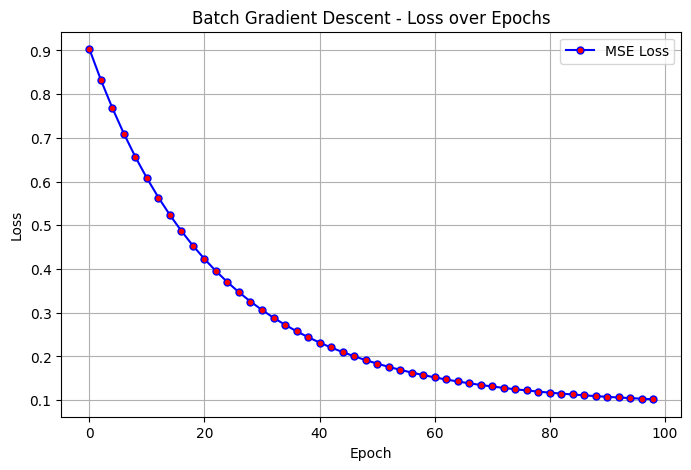

Mean Square Error And R2 score For Training Data
[0.10148293]
[89.21161441]
Mean Square Error And R2 score For Testing Data
[0.22160922]
[82.02207785]


In [22]:
w_init = np.zeros((X_train.shape[1], 1))
b_init = 0 
learning_rate = 0.01
epochs = 100
w_final, b_final = Batch_Gradient_Descent(X_train, Y_train, learning_rate, epochs, w_init, b_init)
print("Mean Square Error And R2 score For Training Data")
print(MSE(X_train,Y_train,w_final,b_final))
print(R2_score(X_train,Y_train,w_final,b_final))
print("Mean Square Error And R2 score For Testing Data")
print(MSE(X_test,Y_test,w_final,b_final))
print(R2_score(X_test,Y_test,w_final,b_final))


<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
MSE & R2_Score Using Stochastic_Gradient_Descent
</h3>  

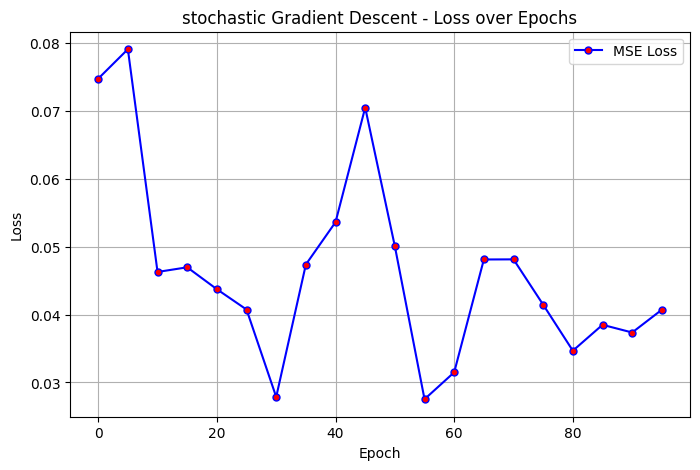

Mean Square Error And R2 score For Training Data
[0.24704593]
[73.73719245]
Mean Square Error And R2 score For Testing Data
[0.56790833]
[53.9287601]


In [23]:
w_init = np.zeros((X_train.shape[1], 1))
b_init = 0 
learning_rate = 0.1
epochs = 100
w_last, b_last = Stochastic_Gradient_Descent(X_train, Y_train, learning_rate, epochs, w_init, b_init)
print("Mean Square Error And R2 score For Training Data")
print(MSE(X_train,Y_train,w_last,b_last))
print(R2_score(X_train,Y_train,w_last,b_last))
print("Mean Square Error And R2 score For Testing Data")
print(MSE(X_test,Y_test,w_last,b_last))
print(R2_score(X_test,Y_test,w_last,b_last))

<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
MSE & R2_Score Using MiniBatch_Gradient_Descent
</h3>  

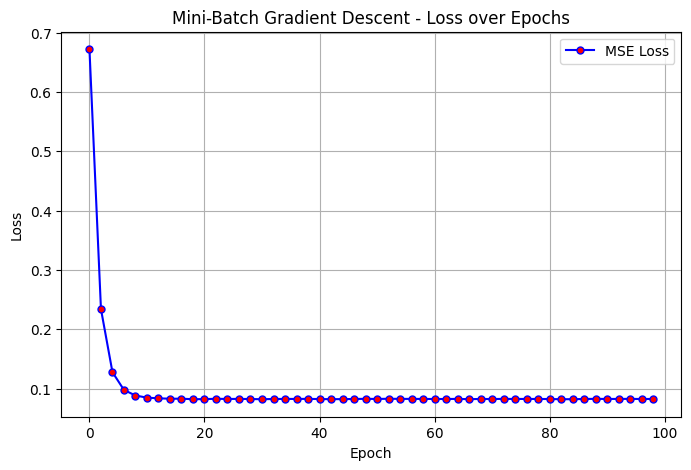

Mean Square Error And R2 score For Training Data
[0.08357638]
[91.115213]
Mean Square Error And R2 score For Testing Data
[0.19046234]
[84.54885113]


In [24]:
w_init = np.zeros((X_train.shape[1], 1))
b_init = 0 
learning_rate = 0.01
epochs = 100
batch_size = 10
w_new, b_new = MiniBatch_Gradient_Descent(X_train, Y_train, learning_rate, epochs, w_init, b_init, batch_size)
print("Mean Square Error And R2 score For Training Data")
print(MSE(X_train,Y_train,w_new,b_new))
print(R2_score(X_train,Y_train,w_new,b_new))
print("Mean Square Error And R2 score For Testing Data")
print(MSE(X_test,Y_test,w_new,b_new))
print(R2_score(X_test,Y_test,w_new,b_new))

<h3 style="background-color: lightblue; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Built in Linear Regression Model
</h3>  

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_pred = lin_reg.predict(X_test)
r2 = r2_score(Y_test, y_pred)*100
print(f"R² Score: {r2:.4f}")

R² Score: 84.4917
